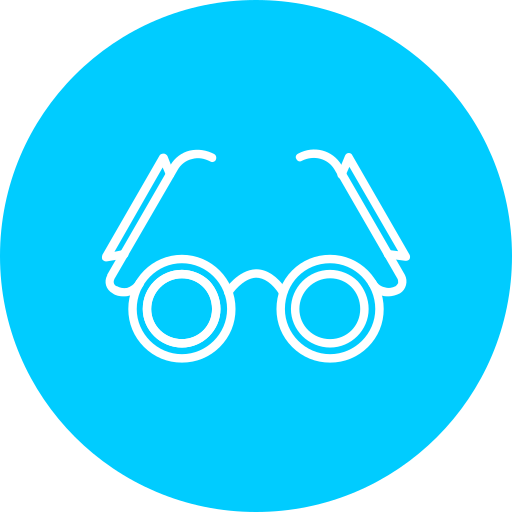

Image credit to Flaticon

# Client Education: Setting Purchase Price Expectations in King County, WA
### Presented by Specs Consulting 

Every Door Real Estate has asked us to architect a solution for clients who strugggle in the pre-approval process when purchasing a property. Specs utilized data about property sales from 2014-2015 in King County, WA to build a model that shows which property attributes influence the sale price of a property. We found that the square foootage of a property's living area, if it is located on a waterfront and, the cconstruction qualiity strongly influence the sale price.

# Set Up: Import Libraries, Load and Examine Data

In [17]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [3]:
# read in data & look at first 10 rows
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#examine the data's quantitative values 
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [122]:
# examine the data's information: data types & null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see that waterfrront is missing about 11% of its values, year renovated is missing about 17% of its values and view is missing a few values as well. 

In [124]:
#looking at the spread for view
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [126]:
#looking at the spread for condition 
data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [127]:
# examine the data's correlations to see what variables would be best for our business problem 
potential_corrs = data.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

price           1.00000
sqft_living     0.70192
sqft_above      0.60537
sqft_living15   0.58524
bathrooms       0.52591
bedrooms        0.30879
lat             0.30669
floors          0.25680
yr_renovated    0.12960
sqft_lot        0.08988
sqft_lot15      0.08284
yr_built        0.05395
zipcode         0.05340
long            0.02204
id              0.01677
Name: price, dtype: float64

# Data Cleaning
Here we create our own copy of the data provided. We will clean the dataset and pull out the columns with the most pertinent information for our business problem. 

In [6]:
#make a copy of the dataset - never overwrite original data 
df = data.copy()

# pull out grade code
df['grade_num'] = data['grade'].map(lambda x:x.split(' ', 1)[0])

# create a ratio for number of bedrooms and bathrooms 
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']

#dropping unnecessary columns: we drop sqft_basement because it had a lot of missing variables and we favor using sqft_living, dropping yr_renovated because it is not of interest for our bussiness problem and there were many missing variables, dropping lat and long in favor of zipcodes for a location variable,  dropping condition in favor the variable we created above: grade_num, froppinng grade because we created our own variable, dropping date because it is not needed for our business problem, dropping view in favor of waterfront, condition had a lack of spread as well
df = df.drop(columns = ['sqft_basement', 'yr_renovated', 'lat', 'long', 'view', 'condition','grade', 'date'])


#create a dummy variable for city location: 1 for within seattle city limits and 0 for outside of city limits
 
#start by creating a list of zipcodes thar are IN the city limits of seattle
zip_city_list = [98101, 98177, 98133, 98155, 98125, 98117, 98103, 98107, 98105, 98195, 98199, 98119, 98109, 98102, 98112, 98121, 98122, 98104, 98134, 98144, 98136, 98126, 98106, 98108, 98118, 98146, 98178]

#if it is within our city limits give it a 1,without give it 0 
df['zip_city'] = np.where(df['zipcode'].isin(zip_city_list),1,0)



#create a dummy waterfront for waterfront location: 1 for on waterfront, 0 for inland, fill null values with "Unknown"
df['waterfront'] = df['waterfront'].fillna("Unknown")

#getting dummy variables for waterfront 0= no water, 1 = yes
df1 = pd.get_dummies(df['waterfront'])

#adding dummies into a main dataframe 
main_df = pd.concat([df, df1], axis=1)

#cleaning up the columns so that we have a clean copy
main_df['Waterfront'] = main_df['YES'].copy()

#dropping unneeded columns: dropping the dummy columns we just created, the zipcode column because we created a column that captures that variable called zip_city and the year_built column because it is not of use for our business problem (has a very low correlation)
main_df = main_df.drop(columns = ['NO', 'Unknown', 'YES', 'waterfront', 'zipcode', 'yr_built'])

#create a column that stores the mean price of all the properties in the dataset for our own reference
mean_price = main_df['price'].mean()
main_df['mean_price'] = main_df['price'].mean()

#take a look at our current dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   sqft_above      21597 non-null  int64  
 8   sqft_living15   21597 non-null  int64  
 9   sqft_lot15      21597 non-null  int64  
 10  grade_num       21597 non-null  object 
 11  bed_bath_ratio  21597 non-null  float64
 12  zip_city        21597 non-null  int64  
 13  Waterfront      21597 non-null  uint8  
 14  mean_price      21597 non-null  float64
dtypes: float64(5), int64(8), object(1), uint8(1)
memory usage: 2.3+ MB


In [9]:
#removing outliers 

#make a copy of the clean dataframe 
no_out = main_df.copy()

#drop columns that we cannot use 
no_out = no_out.drop(columns= ['id', 'zip_city', 'Waterfront'], axis=1)

#change data type so that we can math 
no_out = no_out.astype('float')

#pull out the columns 
columns = no_out.columns

#for each column in the dataframe, get the mean and standard deviation 
#then get the z-score for within 3 standard devaitions
for col in columns:
        
        mean = no_out[col].mean()
        sd = no_out[col].std()
        
        no_out = no_out[(no_out[col] <= mean+(3*sd))]
        
pd.set_option('display.float_format', lambda x: '%.5f' % x)
no_out.info()


#part of this loop is courtesy of Stephen Allwright 

#https://stephenallwright.com/remove-outliers-pandas/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


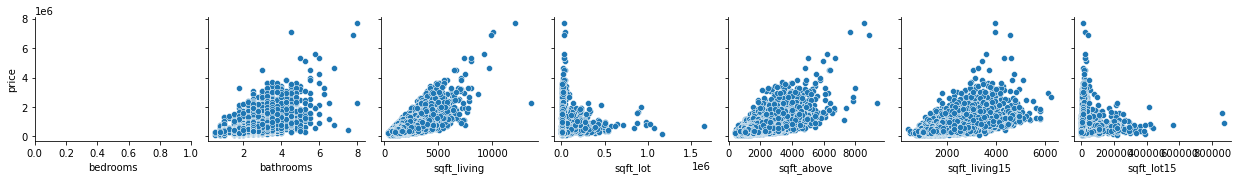

In [10]:
#visual of the clean_df
sns.pairplot(main_df, x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15',
                          'sqft_lot15'], y_vars = ['price'])
plt.show()

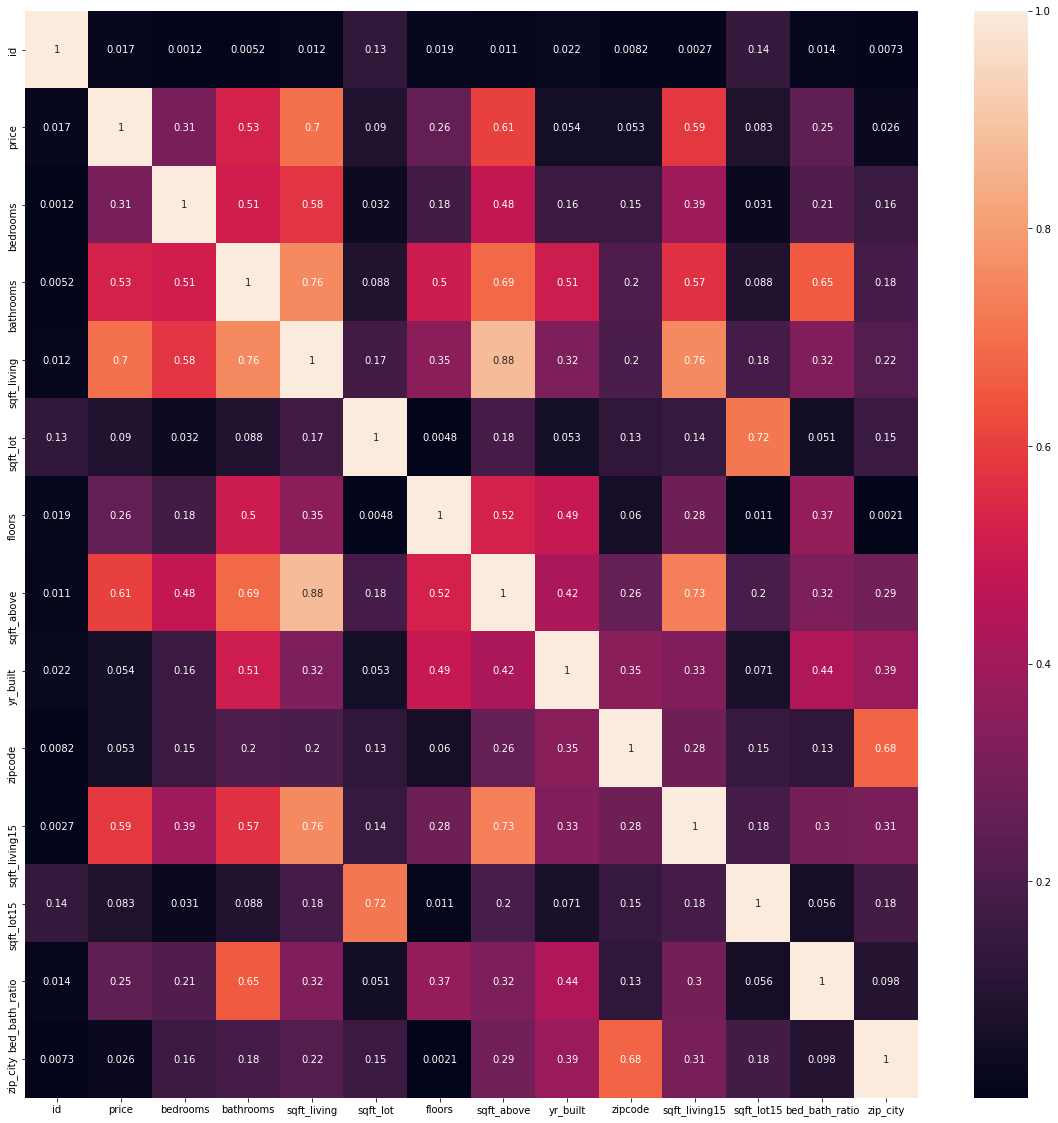

In [11]:
#visual of the clean_df in a heatmap to look at correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [12]:
#adding the dataframe without outliers back into the full data frame 

#make a copy of the data that has been cleaned for outlierrs
not_out = main_df.copy()

#drop the columns that we have cleaned for outliers 
not_out = not_out.drop(columns= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'grade_num', 'bed_bath_ratio','mean_price'], axis=1)

#add the outliers & no-outlier data frames together so that we have all our columns again 
clean_df = pd.concat([no_out, not_out], axis=1)

#drop the null values (for the columns that we did not do the outlier math on )
clean_df = clean_df.dropna()

#check to make sure that we have all our columns with the same amount of data
clean_df.info()

#store our cleaned data as a csv file for future use
clean_df.to_csv('clean_df.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
 12  id              19479 non-null  int64  
 13  zip_city        19479 non-null  int64  
 14  Waterfront      19479 non-null  uint8  
dtypes: float64(12), int64(2), uint8(1)
memory usage: 2.2 MB


In [13]:
#scaling the data for ease of comparison 
clean_df = pd.read_csv('clean_df.csv')

clean_df = clean_df.drop(columns = ['Unnamed: 0'])


# Instantiate a new scaler
scaler = StandardScaler()
#.invert_transform

# scaling for STD 
scaler.fit(clean_df)
#scaler.invert_transform(scaled_df)


#Apply the scale to all the data 
scaled_df = scaler.transform(clean_df)


scaled_df = pd.DataFrame(scaled_df,
                              columns=clean_df.columns,
                              index=clean_df.index)
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade_num,bed_bath_ratio,mean_price,id,zip_city,Waterfront
0,-1.11572,-0.35178,-1.55982,-1.06182,-0.38158,-0.87574,-0.73923,-0.97564,-0.42036,-0.53006,2.24346,0.00000,0.85470,1.39436,-0.05696
1,0.20606,-0.35178,0.28724,0.85057,-0.22479,0.97252,0.73756,-0.37210,-0.14983,-0.53006,-0.70765,0.00000,0.60609,1.39436,-0.05696
2,-1.29093,-1.52070,-1.55982,-1.62591,0.04682,-0.87574,-1.35083,1.40403,-0.09230,-1.53621,0.47280,0.00000,0.33406,-0.71718,-0.05696
3,0.48204,0.81715,1.39548,0.01132,-0.44559,-0.87574,-0.93315,-0.94115,-0.50876,-0.53006,-0.70765,0.00000,-0.75892,1.39436,-0.05696
4,0.08897,-0.35178,-0.08217,-0.37391,-0.14227,-0.87574,0.00662,-0.18242,-0.16833,0.47608,-0.41254,0.00000,-0.94412,-0.71718,-0.05696


In [14]:
#looking back at corrrelations, we can see how they have changed from the original uncleaned data 
potential_corrs1 = scaled_df.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs1

price            1.00000
grade_num        0.61383
sqft_living      0.60783
sqft_living15    0.53187
sqft_above       0.48465
bathrooms        0.43632
bedrooms         0.30181
floors           0.24139
bed_bath_ratio   0.23746
Waterfront       0.10886
zip_city         0.08935
sqft_lot15       0.07954
sqft_lot         0.07637
id               0.00946
mean_price           nan
Name: price, dtype: float64

# Visualizing Our Potential Relationships

Text(0.5, 1.0, 'Sale Price & Waterfront Location')

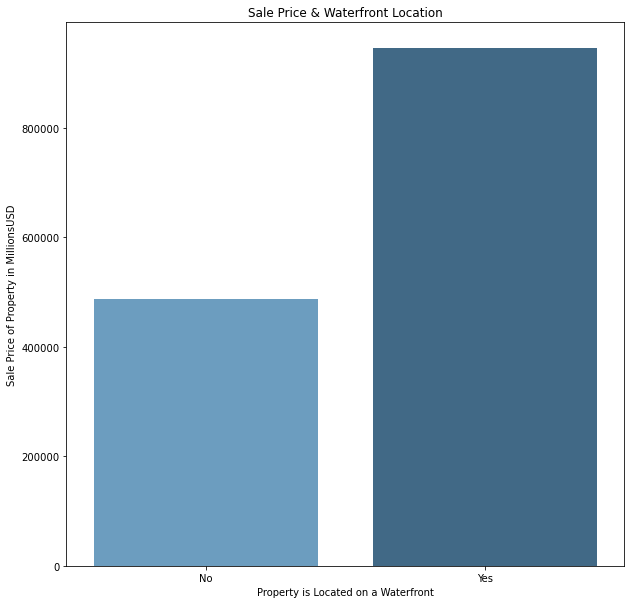

In [61]:
# sale price and waterfront location
water_df = clean_df.copy()
water_map = {1: 'Yes', 0: 'No'}
water_df['Waterfront'] = clean_df['Waterfront'].map(water_map)


fig, ax = plt.subplots(figsize=(10,10))

water_chart = sns.barplot(data=water_df, x="Waterfront", y="price", ci=None, palette = 'Blues_d')


water_chart.set_xlabel("Property is Located on a Waterfront")
water_chart.set_ylabel("Sale Price of Property in MillionsUSD")



water_chart.set_title("Sale Price & Waterfront Location")



water_chart.set_title("Sale Price & Waterfront Location")

We see that properties on a waterfront typically have higher sale prices than properties that are inland

Text(0.5, 1.0, 'Sale Price & Building Quality Grade')

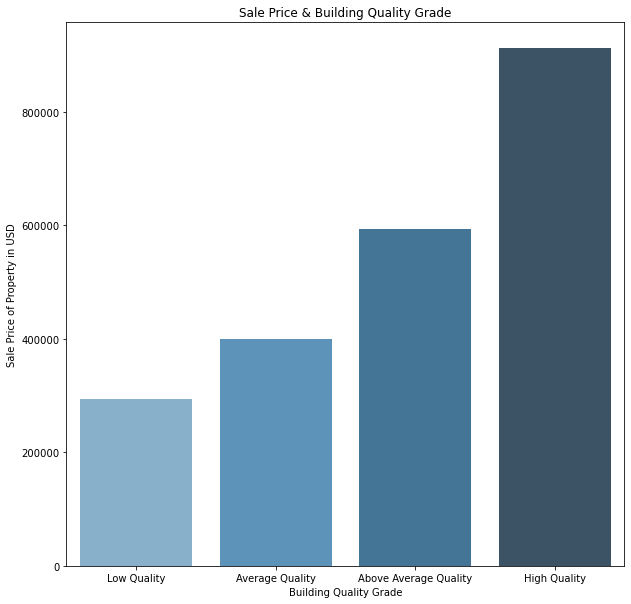

In [130]:

#graphing the relationship between the grade number and sale price
quality_df = clean_df.copy()
quality_df['quality'] = pd.cut(clean_df['grade_num'], [0, 6, 7, 9, 10], labels=['Low Quality', 'Average Quality', 'Above Average Quality', 'High Quality'])
quality_df
fig, ax = plt.subplots(figsize=(10,10))
num_chart = sns.barplot(data=quality_df, x="quality", y="price", ci=None, palette = 'Blues_d')
num_chart.set_xlabel("Building Quality Grade")
num_chart.set_ylabel("Sale Price of Property in USD")



num_chart.set_title("Sale Price & Building Quality Grade")


We see that a higher quality of constructions is associated with a higher sale price

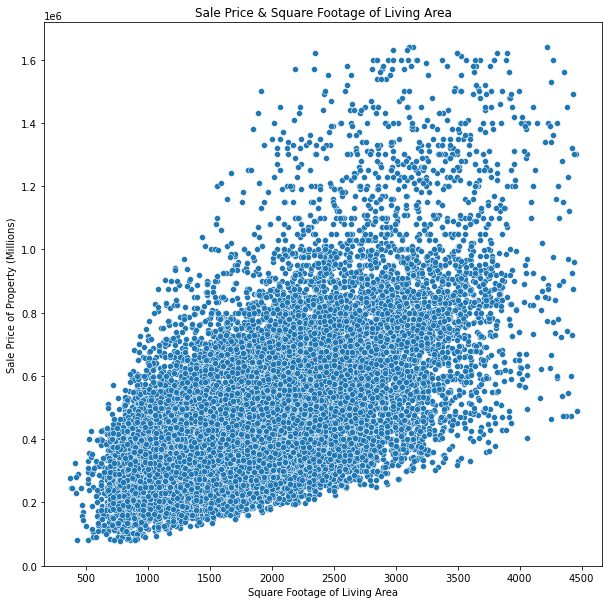

In [57]:
#sqft_living and sale prive
fig, ax = plt.subplots(figsize=(10,10))


sq_chart = sns.scatterplot(data=clean_df, x="sqft_living", y='price',palette = 'Blues_d' )


sq_chart.set_xlabel("Square Footage of Living Area")
sq_chart.set_ylabel("Sale Price of Property (Millions)")



sq_chart.set_title("Sale Price & Square Footage of Living Area")

sq_chart.ticklabel_format(useOffset=False)

We see that typically an increase in square footage of the livingg area is associated with an increase in sale price- although other factors may contribute to this relationship.

# Baseline Model: Mean Price
Creating a baseline model that just examines the mean sale price of a property 

In [18]:
#create the dummy model
dummymodel = DummyRegressor(strategy = 'mean')

#set x and y variables
X = scaled_df.drop(labels = ['grade_num', 'price'], axis=1)
y = scaled_df.price

#look at the fit
print(dummymodel.fit(X,y))

#analyze the z-score
print(dummymodel.score(X,y))

#look at the predictors
y_pred = dummymodel.predict(X)
print(y_pred)

#look at the mean
print(y.mean)

#look at the residuals 
print(y - y_pred)

#with this model we can see that mean price explains little variation

DummyRegressor()
0.0
[-2.04273285e-17 -2.04273285e-17 -2.04273285e-17 ... -2.04273285e-17
 -2.04273285e-17 -2.04273285e-17]
<bound method Series.mean of 0       -1.11572
1        0.20606
2       -1.29093
3        0.48204
4        0.08897
          ...   
19474   -0.53825
19475   -0.37099
19476   -0.36221
19477   -0.37099
19478   -0.68461
Name: price, Length: 19479, dtype: float64>
0       -1.11572
1        0.20606
2       -1.29093
3        0.48204
4        0.08897
          ...   
19474   -0.53825
19475   -0.37099
19476   -0.36221
19477   -0.37099
19478   -0.68461
Name: price, Length: 19479, dtype: float64


# Regression Models
Here we begin to examine potential relationships between different combinations of variables. We are looking to see if we can build a model that shows strong relationships between our variables of interet.

In [19]:
# model 1: sale price & grade_num 
X1 = scaled_df['grade_num']
X1 = sm.add_constant(X)
y1 = scaled_df['price']

model1 = ols('price ~ grade_num', data=scaled_df)
model1_results = model1.fit()
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                 1.178e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -23034.
No. Observations:               19479   AIC:                         4.607e+04
Df Residuals:                   19477   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.88e-16      1.0

In Model 1 we just look at the relationship between grade_number and sale price. We chose this vairable because it had one of the highest corelations. We see that for this model the R-squared could be better and our coefficent for our independent variable is statistically signigcant. Ourr Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [20]:
# model 2: sale price & sqft_living 
X2 = scaled_df['sqft_living']
X2 = sm.add_constant(X)
y2 = scaled_df['price']

model2 = ols('price ~ sqft_living', data=scaled_df)
model2_results = model2.fit()
print(model2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:04:45   Log-Likelihood:                -23148.
No. Observations:               19479   AIC:                         4.630e+04
Df Residuals:                   19477   BIC:                         4.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.89e-18      0.006  -6.84e-16      

In Model 2 we just look at the relationship between sqft_living and sale price. We chose this vairable because it had one of the highest corelations. We see that for this model the R-squared could is slighly better than model 1 and our coefficent for our independent variable is statistically signigcant. Ourr Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [21]:
#model 3: sale price & sqft_living15 
X3 = scaled_df['sqft_living15']
X3 = sm.add_constant(X)
y3 = scaled_df['price']

model3 = ols('price ~ sqft_living15', data=scaled_df)
model3_results = model3.fit()
print(model3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:05:24   Log-Likelihood:                -24401.
No. Observations:               19479   AIC:                         4.881e+04
Df Residuals:                   19477   BIC:                         4.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.89e-18      0.006  -6.41e-16

In Model 3 we just look at the relationship between sqft_living15 and sale price. We chose this vairable because it had one of the highest corelations. We see that for this model the R-squared could is worse than model 1 and model 2, and our coefficent for our independent variable is statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [22]:
#model 4: sale price & sqft_above
X4 = scaled_df['sqft_above']
X4 = sm.add_constant(X)
y4 = scaled_df['price']

model4 = ols('price ~ sqft_above', data=scaled_df)
model4_results = model4.fit()
print(model4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5979.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:05:46   Log-Likelihood:                -25032.
No. Observations:               19479   AIC:                         5.007e+04
Df Residuals:                   19477   BIC:                         5.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.21e-16      1.0

In Model 4 we just look at the relationship between sqft_above and sale price. We chose this vairable because it had one of the highest corelations. We see that for this model the R-squared could is lower than out previous models and our coefficent for our independent variable is statistically signigcant. Ourr Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [23]:
#model 5: sale price & number of bathrooms
X5 = scaled_df['bathrooms']
X5 = sm.add_constant(X)
y5 = scaled_df['price']

model5 = ols('price ~ bathrooms', data=scaled_df)
model5_results = model5.fit()
print(model5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4580.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:06:07   Log-Likelihood:                -25583.
No. Observations:               19479   AIC:                         5.117e+04
Df Residuals:                   19477   BIC:                         5.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.03e-16      1.0

In Model 5 we just look at the relationship between bathrooms and sale price. We chose this vairable because it had one of the higher corelations. We see that for this model the R-squared could is the lowest so far and our coefficent for our independent variable is statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [24]:
#model 6: sale price & grade_num + sqft_living 
X6a = scaled_df[['grade_num','sqft_living']]
X6a = sm.add_constant(X)
y6a = scaled_df['price']

model6 = ols('price ~ grade_num + sqft_living', data=scaled_df)
model6_results = model6.fit()
print(model6_results.summary())

#the Durbin-Watson score is 1.955, meaning that autocorrelation is likley not a cause for concern here. therefore the independence assumptions has been met. 
params = model6_results.params

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7670.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:07:27   Log-Likelihood:                -21982.
No. Observations:               19479   AIC:                         4.397e+04
Df Residuals:                   19476   BIC:                         4.399e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.89e-18      0.005  -7.26e-16      

In Model 6 we look at the relationship between grade_num, sqft_living and sale price. We chose these vairable because they had high corelations. We see that for this model the R-squared could is slighly better than model 1 and our coefficent for our independent variable is statistically signigcant. Ourr Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [25]:
#model 7: sale price & grade + sqft_living + waterfront + zip_city (chose those last 2 bc of mulitcoli)
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model7 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city', data=scaled_df)
model7_results = model7.fit()
print(model7_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     4902.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:07:39   Log-Likelihood:                -20855.
No. Observations:               19479   AIC:                         4.172e+04
Df Residuals:                   19474   BIC:                         4.176e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.863e-17      0.005  -3.68e-15      

In Model 7 we  look at the relationship between grade_num, sqft_living, waterfront, and zip_city and sale price. We chose these vairable because they had high corelations. We see that for this model the R-squared could is slightly better than model 6 and our coefficent for our independent variable is statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [26]:
#model 8: sale price, grade_num, sqft_living and sqft_living15
X = scaled_df[['grade_num','sqft_living', 'sqft_living15']]
X = sm.add_constant(X)
y = scaled_df['price']

model8 = ols('price ~ grade_num + sqft_living + sqft_living15', data=scaled_df)
model8_results = model8.fit()
print(model8_results.summary())

#no sign of mutilcoli when you include both sqft_living & sqft_living15! 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     5176.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:08:28   Log-Likelihood:                -21929.
No. Observations:               19479   AIC:                         4.387e+04
Df Residuals:                   19475   BIC:                         4.390e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.49e-15

In Model 8 we  look at the relationship between grade_num, sqft_living, sqft_living15 and sale price. We chose these vairable because they had high corelations and wanted to see how this combination of variables would compare to model 7. We see that for this model the R-squared could is slightly lower than model 7 and our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [27]:
#model 9: sale price & grade + sqft_living + waterfront + zip_city + sqft_living15
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15']]
X = sm.add_constant(X)
y = scaled_df['price']

model9 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15', data=scaled_df)
model9_results = model9.fit()
print(model9_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4123.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:08:42   Log-Likelihood:                -20607.
No. Observations:               19479   AIC:                         4.123e+04
Df Residuals:                   19473   BIC:                         4.127e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.73e-15

In Model 9 we  look at the relationship between grade_num, sqft_living, sqft_living15, Wtaerfront, zip_city and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 8. We see that for this model the R-squared is our highest so far and our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [131]:

#model 10: sale price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio']]
X = sm.add_constant(X)
y = scaled_df['price']

model10 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio', data=scaled_df)
model10_results = model10.fit()
print(model10_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     3440.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:16:50   Log-Likelihood:                -20601.
No. Observations:               19479   AIC:                         4.122e+04
Df Residuals:                   19472   BIC:                         4.127e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In Model 10 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, bed_bath_ratioand sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 9. We see that for this model the R-squared is our highest so far and our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [29]:
#model 11: sale price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'sqft_lot']]
X = sm.add_constant(X)
y = scaled_df['price']

model11 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot', data=scaled_df)
model11_results = model11.fit()
print(model11_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2950.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:09:11   Log-Likelihood:                -20599.
No. Observations:               19479   AIC:                         4.121e+04
Df Residuals:                   19471   BIC:                         4.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In Model 11 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, bed_bath_ratio, swft_lot and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 10. We see that for this model the R-squared is the same as Model 11, meaning that the addition of sqft_lot did not impact our model by much. Our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [31]:
#model 12: sale price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot15
#trying sqft_lot15 bc the regular sqft_lot was not stat sig 
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'sqft_lot15']]
X = sm.add_constant(X)
y = scaled_df['price']

model12 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + sqft_lot15', data=scaled_df)
model12_results = model12.fit()
print(model12_results.summary())

#same R-sq as model10, but model 10 has less predictors 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2954.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:09:39   Log-Likelihood:                -20591.
No. Observations:               19479   AIC:                         4.120e+04
Df Residuals:                   19471   BIC:                         4.126e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.73e

In Model 12 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, bed_bath_ratio, sqft_lot15 and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 11. We see that for this model the R-squared is the same as Model 11, meaning that the addition of sqft_lot15 instead of sqft_lot did not impact our model by much. Our coefficents for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [32]:
#model 13: sale  price, grade_num, sqft_living, Waterfront, zip_city, swft_living15, bedrooms, bathrooms
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)
y = scaled_df['price']

model13 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bedrooms + bathrooms', data=scaled_df)
model13_results = model13.fit()
print(model13_results.summary())

#all are stat sig, r-sqaured is highest but it seems that as the number beds and baths goes up the price goes down which doesnt make sense with sqft living

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2977.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:10:24   Log-Likelihood:                -20552.
No. Observations:               19479   AIC:                         4.112e+04
Df Residuals:                   19471   BIC:                         4.118e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.74e-15

In Model 13 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, bedrooms, bathrooms and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 12. We see that for this model the R-squared is slightly higher than Model 11. Our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [33]:
#model 14: same as model13 but dropping sqft_living bc bedrooms & bathrooms might be capturing that as well

X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bedrooms', 'bathrooms']]
X = sm.add_constant(X)
y = scaled_df['price']

model14 = ols('price ~ grade_num + Waterfront + zip_city + sqft_living15 + bedrooms + bathrooms', data=scaled_df)
model14_results = model14.fit()
print(model14_results.summary())

#r-sqaured goes down, beds and baths are sig but their coef are very small

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3018.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:10:38   Log-Likelihood:                -21236.
No. Observations:               19479   AIC:                         4.249e+04
Df Residuals:                   19472   BIC:                         4.254e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.61e-15

In Model 14  we  look at the relationship between grade_num, sqft_living15, Waterfront, zip_city, bedrooms, bathrooms and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 13. We see that for this model the R-squared is lower than Model 13. Our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [132]:



#model 15: same as model 10 but including floors: sale price & grade + sqft_living + waterfront + zip_city + sqft_living15 + bed_bath_ratio + floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'bed_bath_ratio', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model15 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + bed_bath_ratio + floors', data=scaled_df)
model15_results = model15.fit()
print(model15_results.summary())

#NOW THIS HAS THE BEST R_SQAURED
#but includingg floors made bed_bath_ratio not stat sig 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2984.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:25:23   Log-Likelihood:                -20541.
No. Observations:               19479   AIC:                         4.110e+04
Df Residuals:                   19471   BIC:                         4.116e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.863e-17      0.005  -3.74e

In Model 15 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, bed_bath_ratio, floors and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 13. We see that for this model the R-squared is  higher than Model 13. Our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [35]:
#model 16: same as model 15 but dropping bed/bath/ratio in favor of floors 
# mulit: price & grade + sqft_living + waterfront + zip_city + sqft_living15 + floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'sqft_living15', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model16 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + sqft_living15 + floors', data=scaled_df)
model16_results = model16.fit()
print(model16_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     3481.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:19   Log-Likelihood:                -20541.
No. Observations:               19479   AIC:                         4.110e+04
Df Residuals:                   19472   BIC:                         4.115e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.74e-15

In Model 16 we  look at the relationship between grade_num, sqft_living, sqft_living15, Waterfront, zip_city, floors and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 15. We see that for this model the R-squared is the same as Model 15, meanining that floors may not be an impactful home attribute. Our coefficent for our independent variables are statistically significant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [36]:
#model 17
# same as model 16 but getting rid of sqft_livinng15 bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & grade + sqft_living + waterfront + zip_city +  floors
X = scaled_df[['grade_num','sqft_living', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model17 = ols('price ~ grade_num + sqft_living + Waterfront + zip_city + floors', data=scaled_df)
model17_results = model17.fit()
print(model17_results.summary())

#our r-sqaured goes down by .012, and floors is still negative; further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3989.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:35   Log-Likelihood:                -20772.
No. Observations:               19479   AIC:                         4.156e+04
Df Residuals:                   19473   BIC:                         4.160e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.863e-17      0.005   -3.7e-15      

In Model 17 we  look at the relationship between grade_num, sqft_living, Waterfront, zip_city, floors and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 16. We see that for this model the R-squared is slightly lower than Model 16. Our coefficent for our independent variables are statistically signigcant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [37]:
#model 18

# same as model 16 but getting rid of sqft_living bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & grade + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[['grade_num','sqft_living15', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model18 = ols('price ~ grade_num + sqft_living15 + Waterfront + zip_city + floors', data=scaled_df)
model18_results = model18.fit()
print(model18_results.summary())

#Rr-sqaured goes down from model 16 by .04 and floors is still negative --> further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3568.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:43   Log-Likelihood:                -21305.
No. Observations:               19479   AIC:                         4.262e+04
Df Residuals:                   19473   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005   -3.6e-15

In Model 18 we  look at the relationship between grade_num, sqft_living15, Waterfront, zip_city, floors and sale price. We chose these vairables because we wanted to see how this combination of variables would compare to model 16, specifically sqft_living vs sqft_living15. We see that for this model the R-squared is lower than Model 17, meanining that sqft_living may be a better measure than sqft_living15 for our model. Our coefficent for our independent variables are statistically significant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.

In [38]:
#model 19

# same as model 16 but getting rid of grade_number bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[['sqft_living15', 'sqft_living', 'Waterfront', 'zip_city', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model19 = ols('price ~  sqft_living15 + sqft_living + Waterfront + zip_city + floors', data=scaled_df)
model19_results = model19.fit()
print(model19_results.summary())

#r-sqaured is still lower than modeel 16, altho floors is postive now (so maybe grade number does contribute)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3406.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:51   Log-Likelihood:                -21519.
No. Observations:               19479   AIC:                         4.305e+04
Df Residuals:                   19473   BIC:                         4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.56e-15

In Model 19 we use the same combination of variables as model 16 but drop grade_num in favor of floors to see if one of them was forcing the negative direction of floors. We find that the R-sqaured is lower, but floors is no longer negative. Our coefficent for our independent variables are statistically significant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.




In [39]:
#model 20

# same as model 16 but getting rid of zip_city bc floors was negative and we want to see if one of the variables may be forcing that direction 
 
# mulit: price & + sqft_living15 + waterfront + zip_city +  floors
X = scaled_df[[ 'grade_num','sqft_living15', 'sqft_living', 'Waterfront','floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model20 = ols('price ~  grade_num + sqft_living15 + sqft_living + Waterfront + floors', data=scaled_df)
model20_results = model20.fit()
print(model20_results.summary())

#floors is negative, we can guess that grade_num is capturing something with floors, but this is not the best moodel we have 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3246.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:59   Log-Likelihood:                -21736.
No. Observations:               19479   AIC:                         4.348e+04
Df Residuals:                   19473   BIC:                         4.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.52e-15



In model 20 we run the same model as model 16 but drop zip_city and keep floors to investigate the interactions between these two variables. We find that the R-sqaured is lowe than in Model 16 and that floors is stil negative. Our coefficents for our independent variables are statistically significant. Our Durbin-Watson score shows that autocorrelation is not cause for concern in this model.
 

In [40]:
#model 21
#wanna look at the interaction between grade and floors 

# mulit: price & + num_grade +  floors
X = scaled_df[['grade_num', 'floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model21 = ols('price ~  grade_num + floors', data=scaled_df)
model21_results = model21.fit()
print(model21_results.summary())

#floors is still negative --> further investigation is needed 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     5928.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:06   Log-Likelihood:                -23009.
No. Observations:               19479   AIC:                         4.602e+04
Df Residuals:                   19476   BIC:                         4.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.006  -6.88e-16      1.0

In model 21 we simply wanted to look at the interaction between floors and grade_num out of curiosity. We hypothesize that as the number of floors increase in a house, so does the amount of building material. Therefore it is more likely that lower quality material was used in the building of the structure.

In [41]:
#model 22
#wanna look at the interaction between price and floors 

# mulit: price & floors
X = scaled_df[['floors']]
X = sm.add_constant(X)
y = scaled_df['price']

model22 = ols('price ~ floors', data=scaled_df)
model22_results = model22.fit()
print(model22_results.summary())

#ok looks like its not negativ anymore!

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1205.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          2.91e-256
Time:                        12:12:13   Log-Likelihood:                -27055.
No. Observations:               19479   AIC:                         5.411e+04
Df Residuals:                   19477   BIC:                         5.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.89e-18      0.007  -5.59e-16      1.0

In Model 22 we wanted to further investiagte the impact of floors. Here we see that floors is postive when no other variables are added. Moreover the R-squared shows that floors alone do not explain much of the variation in sale price.

In [42]:
#model 23: the same as model 16 but adding in sqft_above 
 

# mulit: price & grade_num + swft_liv + water + zip + sqftliv15 + sqftabove + floors 
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'floors', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model23 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above + floors + zip_city', data=scaled_df)
model23_results = model23.fit()
print(model23_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3016.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:21   Log-Likelihood:                -20487.
No. Observations:               19479   AIC:                         4.099e+04
Df Residuals:                   19471   BIC:                         4.105e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.75e-15

In model 23 we add sqft_lot to our independent variables as a point of comparison for model 16. The R-sqaured increases slightly. Now we find that Model 23 is our best model as it has the highest R-Sqaured. Our independent variables are still statistically significant and our Durbin-Watson score shows that autocorrelation is not a cause for concern.

In [43]:
#model 24 
# same as model 23 but dropping floors 
# mulit: price & grade_num + swft_liv + water + zip + sqftliv15 + sqftabove 
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model24 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above + zip_city', data=scaled_df)
model24_results = model24.fit()
print(model24_results.summary())

#best R-sqaured so far!!
#the Durbin-Watson score is 1.950, meaning that autocorrelation is likley not a cause for concern here. therefore the independence assumptions has been met.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3510.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:30   Log-Likelihood:                -20499.
No. Observations:               19479   AIC:                         4.101e+04
Df Residuals:                   19472   BIC:                         4.107e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.75e-15

In Model 24 we invetsigate how dropping the floors variable will impact our model in comparison to model 23. Here we find our best R-sqaured and lowest adjusted R-sqaured. Model 24 is now our best multiple regresssion model.

In [121]:
#model 24.b 
#same as model 24 but taking out zipcity and keeping aqft above 
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15','sqft_above']]
X = sm.add_constant(X)
y = scaled_df['price']

model24b = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above', data=scaled_df)
model24b_results = model24b.fit()
print(model24b_results.summary())


#sqftabove and sqftliving are interacting --> probs bc sqftliving already includes sqft_above; howeber, this model -based on its rsqaured value - fares better in comparison to the same model without sqft_above included

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3428.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:23:35   Log-Likelihood:                -21491.
No. Observations:               19479   AIC:                         4.299e+04
Df Residuals:                   19473   BIC:                         4.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.57e-15

Model 24b is the same as model 24 but we dropped zip_city. The R-sqaured is lower which means that Model 24 explains more of the variation in sale price. Our indepent variables are still stat sig and there is no sign of autocorrelation, accoriding to the Durbin-Watson score.

In [44]:
#model 25
# same as model 23 but dropping zipcode & floorrs bc sqftabove might be capturing the same thing 
# mulit: price & grade_num + swft_liv + water + sqftliv15 + sqftabove + floors
X = scaled_df[['grade_num', 'sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above']]
X = sm.add_constant(X)
y = scaled_df['price']

model25 = ols('price ~  grade_num + sqft_living + Waterfront + sqft_living15 + sqft_above ', data=scaled_df)
model25_results = model25.fit()
print(model25_results.summary())

#not as good as compared to 24 sqft_above and floors are related 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3428.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:44   Log-Likelihood:                -21491.
No. Observations:               19479   AIC:                         4.299e+04
Df Residuals:                   19473   BIC:                         4.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.57e-15

In [45]:
#model 26 
#droppng garde, keeping swft above, dropping floors
# mulit: price &  swft_liv + water + zip + sqftliv15 + sqftabove 
X = scaled_df[['sqft_living', 'Waterfront', 'sqft_living15', 'sqft_above', 'zip_city']]
X = sm.add_constant(X)
y = scaled_df['price']

model26 = ols('price ~  sqft_living + Waterfront + sqft_living15 + sqft_above + zip_city', data=scaled_df)
model26_results = model26.fit()
print(model26_results.summary())

#not as good as compared to model 24 bc the r-squared is lower

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3405.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:53   Log-Likelihood:                -21520.
No. Observations:               19479   AIC:                         4.305e+04
Df Residuals:                   19473   BIC:                         4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.863e-17      0.005  -3.56e-15

# For Future Investigation: Train Test Split Method & Hyperparameters 

In [ ]:
#using the same features/predictors from model 6
features6 = ['sqft_living', 'grade_num']
X6 = clean_df.loc[:, features6]
y6 = clean_df.loc[:, ['price']]

In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, random_state=0, train_size = .75)

In [ ]:
X_train6.shape

In [ ]:
X_test6.shape

In [ ]:
y_test6.shape

In [ ]:
y_train6.shape

In [ ]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)

In [ ]:
model6.predict(X_test6[0:10])

In [ ]:
model6.predict(X_test6.iloc[0].values.reshape(1,-1))

In [ ]:
#r^squared
score6 = model6.score(X_test6, y_test6)
print(score6)

In [ ]:
#Root mean sqaured error

metrics.mean_squared_error(y_test6, model6.predict(X_test6), squared= False)

In [95]:
#using the same features/predictors from model 24

features = ['sqft_living','sqft_above', 'sqft_living15', 'grade_num', 'zip_city', 'Waterfront']
X = clean_df.loc[:, features]
y = clean_df.loc[:, ['price']]

In [96]:
#creating variables for train test split and instatiating a random state for our training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [97]:
#looking at the shape of the x_train
X_train.shape

(14609, 6)

In [98]:
#looking at the shape of the x_test
X_test.shape


(4870, 6)

In [99]:
#looking at the shape of the y_train
y_train.shape

(14609, 1)

In [100]:
#looking at the shape of the y_test
y_test.shape

(4870, 1)

In [101]:
#instatiating the model
main_model = LinearRegression()

In [102]:
#fitting the model
main_model.fit(X_train, y_train)

LinearRegression()

In [103]:
#looking at our predictor prices for the first 10 properties in the datatset
main_model.predict(X_test[0:10])

array([[168852.86920966],
       [850903.04450094],
       [570482.59235329],
       [462683.78473836],
       [432918.48295905],
       [438498.71068271],
       [315157.66401969],
       [374456.41367795],
       [507950.34212905],
       [818879.26399739]])

In [104]:
#looking at the test
X_test.head(1)

,sqft_living,sqft_above,sqft_living15,grade_num,zip_city,Waterfront
183,860.00000,860.00000,1300.00000,6.00000,0,0


In [105]:
# predict 1 observation.
#predicting the price for the house/row specifed in the x_test.head(1) column
main_model.predict(X_test.iloc[0].values.reshape(1,-1))


array([[168852.86920966]])

In [106]:
#testing to see if the prices match
X_test.head()
main_model.predict(X_test.iloc[4].values.reshape(1,-1))

array([[432918.48295905]])

In [107]:
#r^squared score 
score = main_model.score(X_test, y_test)
print(score)

0.5185992700767819


In [108]:
#looking at the root mean sqaured error 
from sklearn import metrics

metrics.mean_squared_error(y_test, main_model.predict(X_test), squared= False)

167125.71922849427

In [109]:
#hyper parameters for tuning the model
max_depth_range = list(range(1, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
                            random_state = 0)
    reg.fit(X_train, y_train)   
    
    score = reg.score(X_test, y_test)
    r2_list.append(score)

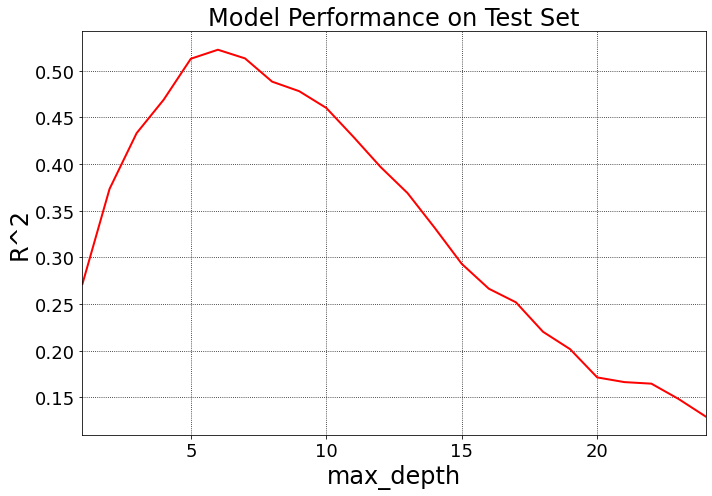

In [110]:
#plotting the model performance 
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

In [111]:
"""
our r-sqaured came out at about .51
the best posssible r-sqaured value for the model would be between .50 and .55 
to avoid data leakage, we will not use hyper paramters for our model, and favor the features we chose from model 24
for future analysis, we will devise a model that has an r-squared of .55 

"""

'\nour r-sqaured came out at about .51\nthe best posssible r-sqaured value for the model would be between .50 and .55 \nto avoid data leakage, we will not use hyper paramters for our model, and favor the features we chose from model 24\nfor future analysis, we will devise a model that has an r-squared of .55 \n\n'

# Creating an Example of Expectations for a Family Looking for a New Home

In [112]:
#creating a copy of our test data
X_test1 = X_test.copy()

In [113]:
# making a fake data frame 
# using the mean or most frequent value for each variable/column
example_sq_live = [2080]
example_data = pd.DataFrame(example_sq_live, columns=['sqft_living'])
example_grade = [7]
example_data['grade_num'] = example_grade 
example_water = [0]
example_data['Waterfront'] = example_water 
example_liv15 = [1905]
example_data["sqft_living15"] = example_liv15
example_above = [1675]
example_data["sqft_above"] = example_above
example_zip = [0]
example_data["zip_city"] = example_zip 
example_data

,sqft_living,grade_num,Waterfront,sqft_living15,sqft_above,zip_city
0,2080,7,0,1905,1675,0


In [119]:
# addding the example data into our dataframe
df3 = pd.concat([example_data, X_test1], ignore_index = True)
df3.reset_index()
df3.head(10)

,sqft_living,grade_num,Waterfront,sqft_living15,sqft_above,zip_city
0,2080.00000,7.00000,0,1905.00000,1675.00000,0
1,860.00000,6.00000,0,1300.00000,860.00000,0
2,3210.00000,10.00000,0,3330.00000,3210.00000,0
3,2420.00000,8.00000,0,2690.00000,2420.00000,0
4,2210.00000,7.00000,0,2110.00000,1450.00000,0
5,2000.00000,7.00000,0,2050.00000,1400.00000,0
6,2235.00000,7.00000,0,1460.00000,990.00000,0
7,1180.00000,7.00000,0,1780.00000,1180.00000,0
8,1840.00000,7.00000,0,1480.00000,1270.00000,0
9,1570.00000,8.00000,0,1000.00000,1260.00000,1


In [117]:
main_model.predict(X_test[0:10])




array([[168852.86920966],
       [850903.04450094],
       [570482.59235329],
       [462683.78473836],
       [432918.48295905],
       [438498.71068271],
       [315157.66401969],
       [374456.41367795],
       [507950.34212905],
       [818879.26399739]])

In [120]:
"""
The 168852 from the above array corresponds to the second row, index 1, from df3. Therefore a family with a budget of about 170k could afford a home with the attributes displayed in that row.
Respectively, the 818879 from the above array corresponds to the tenth row, index 9, from df3. Therefore a family with a budget of about 820k could afford a property with those corresponding attributes.




"""

'\nThe 168852 from the above array corresponds to the second row, index 1, from df3. Therefore a family with a budget of about 170k could afford a home with the attributes displayed in that row.\nRespectively, the 818879 from the above array corresponds to the tenth row, index 9, from df3. Therefore a family with a budget of about 820k could afford a property with those corresponding attributes.\n\n\n\n\n'